# Decision Tree

### Importing the dataset

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [70]:
df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, 2:4].values
y = df.iloc[:, -1].values

In [71]:
X[0]

array([   19, 19000], dtype=int64)

In [72]:
y[0]

0

### Splitting the dataset

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Feature scaling

In [74]:
from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

### Building a decision tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Predicting a value

In [76]:
dt.predict(ss_X.transform([[19, 19000]]))

array([0], dtype=int64)

### Predicting using the test set

In [77]:
y_pred = dt.predict(X_test)

### Printing the predictions and actual values side by side

In [78]:
np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1)[:15]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0]], dtype=int64)

### Evaluating the decision tree

In [79]:
from sklearn import metrics
print('confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('accuracy:', metrics.accuracy_score(y_test, y_pred))
print('precision:', metrics.precision_score(y_test, y_pred))
print('recall:', metrics.recall_score(y_test, y_pred))
print('f1-score:', metrics.f1_score(y_test, y_pred))

confusion matrix:
 [[62  6]
 [ 3 29]]
accuracy: 0.91
precision: 0.8285714285714286
recall: 0.90625
f1-score: 0.8656716417910447


### Visualising the training set results (lower resolution, faster)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


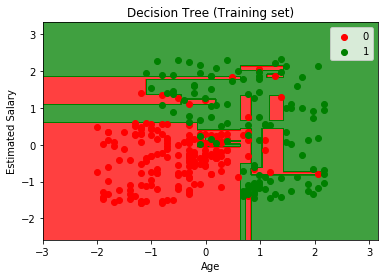

In [80]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train # X_train, y_train for training set
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, dt.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the training set results (lower resolution, faster)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


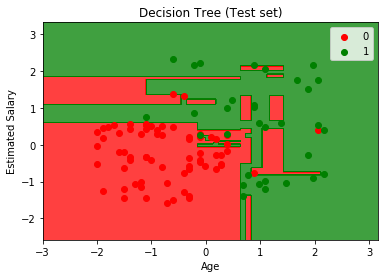

In [81]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test # X_train, y_train for training set
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, dt.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, criterion='gini', random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

### Hyperparameter tuning using grid search (more in-depth)

In [117]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 40, 100],
    'max_features': [2, 'sqrt'],
    'min_samples_leaf': [1, 3, 6, 14],
    'min_samples_split': [2, 6, 14],
    'n_estimators': [100]
}
grid = GridSearchCV(RandomForestClassifier(), param_grid, verbose=3)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
y_pred = grid.predict(X_test)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.883, total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.817, total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.833, total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s



[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.850, total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.917, total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=100, score=0.883, total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=100, score=0.850, total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  c

[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=100, score=0.850, total=   0.4s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=100, score=0.883, total=   0.5s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=100, score=0.917, total=   0.4s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=100, score=0.983, total=   0.5s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=6, min_samples_split=14, n_estimators=100 
[CV]  c

[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, score=0.983, total=   0.4s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=100, score=0.883, total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=100, score=0.833, total=   0.4s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=100, score=0.850, total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split

[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=14, n_estimators=100, score=0.900, total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=14, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=14, n_estimators=100, score=0.917, total=   0.4s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=14, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=14, n_estimators=100, score=0.983, total=   0.4s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=14, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=14, min_samples_split=2, n_estimators=100, score=0.867, total=   0.5s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=14, min_samples_spl

[CV]  criterion=gini, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.883, total=   0.4s
[CV] criterion=gini, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.867, total=   0.4s
[CV] criterion=gini, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.867, total=   0.3s
[CV] criterion=gini, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.917, total=   0.4s
[CV] criterion=gini, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  cr

[CV]  criterion=gini, max_depth=40, max_features=2, min_samples_leaf=14, min_samples_split=2, n_estimators=100, score=0.917, total=   0.2s
[CV] criterion=gini, max_depth=40, max_features=2, min_samples_leaf=14, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=40, max_features=2, min_samples_leaf=14, min_samples_split=2, n_estimators=100, score=0.983, total=   0.2s
[CV] criterion=gini, max_depth=40, max_features=2, min_samples_leaf=14, min_samples_split=6, n_estimators=100 
[CV]  criterion=gini, max_depth=40, max_features=2, min_samples_leaf=14, min_samples_split=6, n_estimators=100, score=0.867, total=   0.1s
[CV] criterion=gini, max_depth=40, max_features=2, min_samples_leaf=14, min_samples_split=6, n_estimators=100 
[CV]  criterion=gini, max_depth=40, max_features=2, min_samples_leaf=14, min_samples_split=6, n_estimators=100, score=0.850, total=   0.1s
[CV] criterion=gini, max_depth=40, max_features=2, min_samples_leaf=14, min_samples_split=6, n_estimators=100 


[CV]  criterion=gini, max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=100, score=0.850, total=   0.1s
[CV] criterion=gini, max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=100 
[CV]  criterion=gini, max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=100, score=0.833, total=   0.1s
[CV] criterion=gini, max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=100 
[CV]  criterion=gini, max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=100, score=0.917, total=   0.1s
[CV] criterion=gini, max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=100 
[CV]  criterion=gini, max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=100, score=0.950, total=   0.1s
[CV] criterion=gini, max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n

[CV]  criterion=gini, max_depth=40, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=100, score=0.867, total=   0.1s
[CV] criterion=gini, max_depth=40, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=100 
[CV]  criterion=gini, max_depth=40, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=100, score=0.850, total=   0.1s
[CV] criterion=gini, max_depth=40, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=100 
[CV]  criterion=gini, max_depth=40, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=100, score=0.883, total=   0.1s
[CV] criterion=gini, max_depth=40, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=100 
[CV]  criterion=gini, max_depth=40, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=100, score=0.917, total=   0.1s
[CV] criterion=gini, max_depth=40, max_features=sqrt, min_samples_leaf=14, min_samp

[CV]  criterion=gini, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=14, n_estimators=100, score=0.983, total=   0.1s
[CV] criterion=gini, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=2, n_estimators=100, score=0.883, total=   0.1s
[CV] criterion=gini, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=2, n_estimators=100, score=0.850, total=   0.1s
[CV] criterion=gini, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=2, n_estimators=100, score=0.883, total=   0.1s
[CV] criterion=gini, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=2, n_estimators=100 

[CV]  criterion=gini, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.917, total=   0.1s
[CV] criterion=gini, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.917, total=   0.1s
[CV] criterion=gini, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  criterion=gini, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, score=0.883, total=   0.1s
[CV] criterion=gini, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  criterion=gini, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, score=0.867, total=   0.1s
[CV] criterion=gini, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_spl

[CV]  criterion=gini, max_depth=100, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=100, score=0.883, total=   0.1s
[CV] criterion=gini, max_depth=100, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=100 
[CV]  criterion=gini, max_depth=100, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=100, score=0.850, total=   0.1s
[CV] criterion=gini, max_depth=100, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=100 
[CV]  criterion=gini, max_depth=100, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=100, score=0.883, total=   0.1s
[CV] criterion=gini, max_depth=100, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=100 
[CV]  criterion=gini, max_depth=100, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=100, score=0.917, total=   0.1s
[CV] criterion=gini, max_depth=100, max_features=sqrt, min_samples_leaf=6, min_samples_spl

[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=100, score=0.867, total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=100, score=0.917, total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=100, score=0.933, total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=14, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=14, n_estimators=100, score=0.883, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=14,

[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=6, min_samples_split=14, n_estimators=100, score=0.850, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=6, min_samples_split=14, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=6, min_samples_split=14, n_estimators=100, score=0.900, total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=6, min_samples_split=14, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=6, min_samples_split=14, n_estimators=100, score=0.917, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=6, min_samples_split=14, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=6, min_samples_split=14, n_estimators=100, score=0.983, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=14, min_samples_spl

[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=100, score=0.917, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=100, score=0.983, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.883, total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.850, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf

[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=14, min_samples_split=2, n_estimators=100, score=0.867, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=14, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=14, min_samples_split=2, n_estimators=100, score=0.850, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=14, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=14, min_samples_split=2, n_estimators=100, score=0.883, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=14, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=14, min_samples_split=2, n_estimators=100, score=0.917, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_

[CV]  criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.867, total=   0.1s
[CV] criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.917, total=   0.2s
[CV] criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.933, total=   0.2s
[CV] criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=100 
[CV]  criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=100, score=0.900, total=   0.1s
[CV] criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=6, n_

[CV]  criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=14, min_samples_split=6, n_estimators=100, score=0.850, total=   0.1s
[CV] criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=14, min_samples_split=6, n_estimators=100 
[CV]  criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=14, min_samples_split=6, n_estimators=100, score=0.883, total=   0.1s
[CV] criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=14, min_samples_split=6, n_estimators=100 
[CV]  criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=14, min_samples_split=6, n_estimators=100, score=0.917, total=   0.1s
[CV] criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=14, min_samples_split=6, n_estimators=100 
[CV]  criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=14, min_samples_split=6, n_estimators=100, score=0.983, total=   0.1s
[CV] criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=14, min_samples_spl

[CV]  criterion=entropy, max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=100, score=0.917, total=   0.1s
[CV] criterion=entropy, max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=100 
[CV]  criterion=entropy, max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=100, score=0.983, total=   0.1s
[CV] criterion=entropy, max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=100 
[CV]  criterion=entropy, max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=100, score=0.883, total=   0.1s
[CV] criterion=entropy, max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=100 
[CV]  criterion=entropy, max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=100, score=0.833, total=   0.1s
[CV] criterion=entropy, max_depth=40, max_features=sqrt, min_samples_lea

[CV]  criterion=entropy, max_depth=40, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=100, score=0.867, total=   0.2s
[CV] criterion=entropy, max_depth=40, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=100 
[CV]  criterion=entropy, max_depth=40, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=100, score=0.850, total=   0.2s
[CV] criterion=entropy, max_depth=40, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=100 
[CV]  criterion=entropy, max_depth=40, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=100, score=0.883, total=   0.2s
[CV] criterion=entropy, max_depth=40, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=100 
[CV]  criterion=entropy, max_depth=40, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=100, score=0.917, total=   0.2s
[CV] criterion=entropy, max_depth=40, max_features=sqrt, min_s

[CV]  criterion=entropy, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=14, n_estimators=100, score=0.850, total=   0.1s
[CV] criterion=entropy, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=14, n_estimators=100 
[CV]  criterion=entropy, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=14, n_estimators=100, score=0.917, total=   0.1s
[CV] criterion=entropy, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=14, n_estimators=100 
[CV]  criterion=entropy, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=14, n_estimators=100, score=0.967, total=   0.1s
[CV] criterion=entropy, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=2, n_estimators=100, score=0.883, total=   0.1s
[CV] criterion=entropy, max_depth=100, max_features=2, min_samples_leaf=6, min_sample

[CV]  criterion=entropy, max_depth=100, max_features=2, min_samples_leaf=14, min_samples_split=14, n_estimators=100, score=0.983, total=   0.2s
[CV] criterion=entropy, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.900, total=   0.1s
[CV] criterion=entropy, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.850, total=   0.1s
[CV] criterion=entropy, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.800, total=   0.1s
[CV] criterion=entropy, max_depth=100, max_features=sqrt, min_samples_

[CV]  criterion=entropy, max_depth=100, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100, score=0.883, total=   0.2s
[CV] criterion=entropy, max_depth=100, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=100, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100, score=0.917, total=   0.2s
[CV] criterion=entropy, max_depth=100, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=100, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100, score=0.983, total=   0.2s
[CV] criterion=entropy, max_depth=100, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=100 
[CV]  criterion=entropy, max_depth=100, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=100, score=0.883, total=   0.2s
[CV] criterion=entropy, max_depth=100, max_features=sqrt, min_samples

[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  2.1min finished


### Predicting a value

In [118]:
rf.predict(ss_X.transform([[19, 19000]]))

array([0], dtype=int64)

### Predicting using the test set

In [119]:
y_pred = rf.predict(X_test)

### Printing the predictions and actual values side by side

In [120]:
np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1)[:15]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

### Evaluating the random forest

In [121]:
from sklearn import metrics
print('confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('accuracy:', metrics.accuracy_score(y_test, y_pred))
print('precision:', metrics.precision_score(y_test, y_pred))
print('recall:', metrics.recall_score(y_test, y_pred))
print('f1-score:', metrics.f1_score(y_test, y_pred))

confusion matrix:
 [[64  4]
 [ 4 28]]
accuracy: 0.92
precision: 0.875
recall: 0.875
f1-score: 0.875


### Visualising the training set results (lower resolution, faster)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


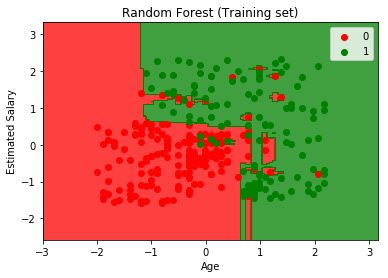

In [122]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train # X_train, y_train for training set
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the training set results (lower resolution, faster)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


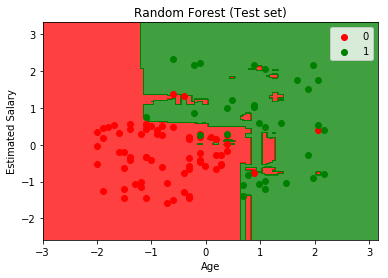

In [123]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test # X_train, y_train for training set
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()